# The Graph Isomorphism Problem
## Introduction
The graph isomorphism problem is the problem of computing whether or not two finite graphs are isomorphic.
Graphs are considered isomorphic when relabeling vertices from one graph will give you an exact copy of the second graph.
It is considered a problem because the current methods of determining whether or not two complex graphs are isomorphic are inefficient computationally.
This report aims to explore the graph isomorphism problem and some of it's history.

## What is a Graph?
In graph theory, a graph is a mathematical structure consisting of a set of vertices and a set of edges connecting those vertices. In simple terms, a graph can be anything that has a set of items that are related to each other in a certain way. The vertices are the items, and the edges are the relations.
### What are Vertices?
A vertex, plural vertices, in graph theory is considered an object and is joined to other items vertices via their relation. A vertex can be joined to multiple other vertices or as few as one other vertex. Vertices are normally displayed as circles when they are visualized.
### What are Edges?
The edges of a graph are the connections or relationships that two vertices have with each other. An edge can either connect a vertex to another vertex or to itself. Edges are normally displayed as lines between vertices when a graph is visualized.

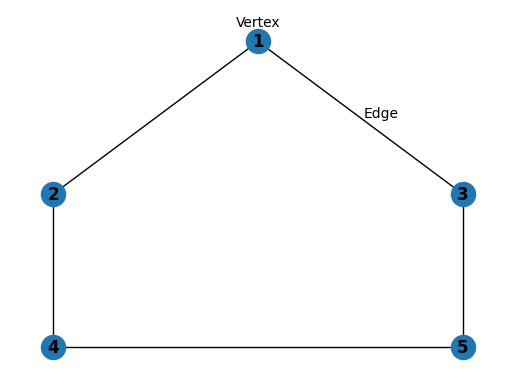

In [15]:
#Code to visualise a simple graph
import networkx as nx
import matplotlib.pyplot as plt

# create an empty graph
G = nx.Graph()

# add nodes with positions
G.add_node(1, pos=(3, 3))
G.add_node(2, pos=(1, 2))
G.add_node(3, pos=(5, 2))
G.add_node(4, pos=(1, 1))
G.add_node(5, pos=(5, 1))

# add edges
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)
G.add_edge(1, 2)

# get node positions
pos = nx.get_node_attributes(G, 'pos')

# add label at midpoint of edge 1-3 To disply indicate what the edge is
midpoint = tuple((pos[1][i] + pos[3][i]) / 2 for i in range(2))
plt.text(midpoint[0] + 0.2, midpoint[1], "Edge", ha='center')

# add label above node 1 to display a vetex
plt.text(pos[1][0], pos[1][1]+0.1, "Vertex", ha='center')


# draw graph
nx.draw(G, pos, with_labels=True, font_size=12, font_weight='bold')

# show plot
plt.show()

In the above graph that has been visualized with python code, we can see that the graph has five vertices and five edges.
### What Are Degrees?
The degree of a vertex in graph theory terms is the amount of edges that are connected to said vertex. In the above visualisation, you can see that vertex 1 has a degree of two as it has two edges connected to it.
### Mathematical Notation.
The mathematical notation used to describe the above graph is as follows:\
\
$ G(V,E) $ *A Graph $G$ with a set of vertices $V$ and a set of edges $E$.*\
$ V = \{v_1,v_2,v_3,v_4,v_5\}$ *A set of 5 vertices.*\
$ E = \{e_1,e_2,e_3,e_4,e_5\}$ *A set of 5 edges.*\
\
$ V = \{1,2,3,4,5\}$ *This graphs vertices.*\
$ E = \{(1, 3),(2, 4),(3, 5),(4, 5),(1, 2)\}$ *This graphs edges.*

## What is Graph Isomorphism?
In graph theory, two graphs are considered to be isomorphic if their structures are the same, regardless of whether the vertices and edges are labeled differently.\
Basically, if a graph can be rearranged and relabeled without altering its structure to produce a graph identical to another, the graphs are considered isomorphic.\
Consider the following visualization of two graphs that appear to look different but are actually isomorphic.

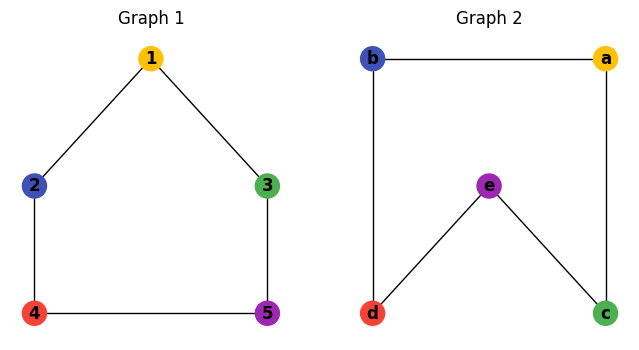

The graphs are isomorphic!


In [37]:
# code to plot two isomorphic graphs side by side
import networkx as nx
import matplotlib.pyplot as plt

# create first graph
G1 = nx.Graph()
G1.add_node(1, pos=(3, 3))
G1.add_node(2, pos=(1, 2))
G1.add_node(3, pos=(5, 2))
G1.add_node(4, pos=(1, 1))
G1.add_node(5, pos=(5, 1))
G1.add_edge(1, 3)
G1.add_edge(2, 4)
G1.add_edge(3, 5)
G1.add_edge(4, 5)
G1.add_edge(1, 2)
pos1 = nx.get_node_attributes(G1, 'pos')

# create second graph
G2 = nx.Graph()
G2.add_node('a', pos=(4, 4))
G2.add_node('b', pos=(2, 4))
G2.add_node('c', pos=(4, 2))
G2.add_node('d', pos=(2, 2))
G2.add_node('e', pos=(3, 3))
G2.add_edge('a', 'c')
G2.add_edge('b', 'd')
G2.add_edge('c', 'e')
G2.add_edge('d', 'e')
G2.add_edge('a', 'b')
pos2 = nx.get_node_attributes(G2, 'pos')

# assign colors to nodes
node_colors1 = ['#FFC107', '#3F51B5', '#4CAF50', '#F44336', '#9C27B0']
node_colors2 = ['#FFC107', '#3F51B5', '#4CAF50', '#F44336', '#9C27B0']

# plot graphs side by side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

nx.draw(G1, pos1, ax=axs[0], with_labels=True, font_size=12, font_weight='bold', node_color=node_colors1)
axs[0].set_title('Graph 1')

nx.draw(G2, pos2, ax=axs[1], with_labels=True, font_size=12, font_weight='bold', node_color=node_colors2)
axs[1].set_title('Graph 2')

plt.show()

# check if the two graphs are isomorphic with networkx functionailty
if nx.is_isomorphic(G1, G2):
    print("The graphs are isomorphic!")
else:
    print("The graphs are not isomorphic.")

While both graphs shown here appear different visually, upon closer inspection, the graphs are isomorphic, as the edges and vertices are identical even though they are labeled and displayed differently. The corresponding nodes on each graph have been colored in the same way to make this easier to see.
### Stricter Definition

Two graphs are isomorphic if there exists a bijection (one-to-one and onto function) between their vertices that preserves the edges. 

Let  $G1 = (V1, E1)$ and $G2 = (V2, E2)$ be two graphs. A function $f: V1 → V2$ is said to be an isomorphism between $G1$ and $G2$ if and only if:

1. $f$ is bijective, i.e., each vertex in $V1$ is mapped to a unique vertex in $V2$, and vice versa.

2. $f$ preserves the edges, i.e., for any vertices $u$ and $v$ in $V1$, $u$ and $v$ are adjacent in $G1$ if and only if $f(u)$ and $f(v)$ are adjacent in $G2$. 

If such a bijective function exists between $G1$ and $G2$, then $G1$ and $G2$ are said to be isomorphic, and we write $G1 ≅ G2$.

### Proving Isomorphism
Code can be used to calculate wether or not simple graphs are isometric.\
The Fucntion performs the following checks:
* Both graphs have the same number of nodes
* Both graphs have the same number of edges
* Both graphs have the same degree sequence
* Check if the mapping is a valid isomorphism by ensuring that each node in G1 is mapped to a corresponding node in G2
* Check that the neighbors of each node in G1 are mapped to corresponding neighbors in G2.


In [38]:
import networkx as nx

# create first graph
G1 = nx.Graph([(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)])

# create second graph
G2 = nx.Graph([('a', 'b'), ('a', 'c'), ('b', 'd'),('c', 'e'), ('d', 'e')])
              
# function to check isomorphsim
def is_isomorphic(G1, G2):
    # Check if both graphs have the same number of nodes and edges
    if G1.number_of_nodes() != G2.number_of_nodes() or G1.number_of_edges() != G2.number_of_edges():
        return False

    # check if both graphs have the same degree sequence
    # .degree returns a dictionary of nodes and their degrees
    # the dictionary is then iterated over and stores the degree values
    # the list is then sorted
    degree_sequence1 = sorted([d for n, d in G1.degree()])
    degree_sequence2 = sorted([d for n, d in G2.degree()])
    # compare both lists
    if degree_sequence1 != degree_sequence2:
        return False

    # Try to match nodes from G1 to nodes in G2
    # declare an empty dictionary for mapping and empty set for matched nodes
    node_map = {}
    used_nodes = set()
    # loop through all nodes in G1
    for node1 in G1.nodes():
        # create a list of all unused nodes in g2 that have the same degrees
        possible_nodes = [node2 for node2 in G2.nodes() if node2 not in used_nodes and G1.degree(node1) == G2.degree(node2)]
        # if there is no appropriate node in g2 then graphs are not isomorphic
        if not possible_nodes:
            return False
        # Pick the first possible node and add it to the mapping
        node2 = possible_nodes[0]
        node_map[node1] = node2
        # add node to the set of used nodes to ensure it is not used again
        used_nodes.add(node2)

    # Check if the mapping is a valid isomorphism
    # loop through every node
    for node1, node2 in node_map.items():
        # loop through each neighbor node for said node
        for neighbor1 in G1.neighbors(node1):
            # map each to it's corresponing node in G2
            neighbor2 = node_map[neighbor1]
            # check if  neighbor2 is a neighbor of node2 in G2. if it is not it is not isomorphic
            if neighbor2 not in G2.neighbors(node2):
                return False

    return True


if is_isomorphic(G1, G2):
    print("The graphs are isomorphic!")
else:
    print("The graphs are not isomorphic.")


The graphs are isomorphic!


## The Graph Isomorphism Problem
While the above code runs perfactly fine for smaller graphs like our example we quickly will run into problems as we start scaling the size of our graphs.\
The above code essentialy brute forces its way through the problem by itterating through every possible mapping between the nodes of both graphs. Wile insignificant for graphs this size it becomes very computationally expensive very quickly when you add more nodes to the graphs.\
If you have two graphs that each have five nodes each then the possible number of mappings is five factorial or $5!$ which is 120, by adding one more node this increases to $6!$ or 720, and the time we get to ten nodes the possible mapping has allready increased to $10!$ or 3628800.\
This means that for two graphs with a set of $n$ vertices $ V = \{v_1,v_2,...,v_n\}$ there are $n!$ possibile mappings to compare.\
Even though there have been decades of research, no polynomial-time algorithm has been found that can solve the Graph Isomorphism Problem for all graphs. However, there are certain classes of graphs for which the problem can be solved more efficiently, such as those that are planar or have bounded treewidth. Additionally, there are heuristic methods that can be used to quickly approximate whether two graphs are isomorphic, such as the Weisfeiler-Lehman algorithm.\
Overall, the Graph Isomorphism Problem remains an active area of research and a challenging problem in computer science, with many potential applications in fields such as chemistry, network analysis, and data mining.